In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = "/content/drive/MyDrive/"

In [ ]:
X_train = np.loadtxt(path + "X_train.csv")
y_train = np.loadtxt(path + "Y_train.csv")
X_test = np.loadtxt(path + "X_test.csv")
y_test = np.loadtxt(path + "Y_test.csv")

In [ ]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (100, 2)
y_train.shape (100,)
X_test.shape (50, 2)
y_test.shape (50,)


# QUESTION 1

In [ ]:
X = np.array([[2, 1], [4, 5], [0, -2]]) # 3 x 2
w = np.random.rand(X.shape[1], 4) # 2 x 4
b = np.random.rand(1, 4) # 1 x 4
y = np.dot(X, w) + b

In [ ]:
class Sigmoid:
  def __init__(self):
    None

  # Define activation function
  def forward(self, z):
    return 1/(1 + np.exp(-z))

  def backward(self, z):
    return self.forward(z)*(1 - self.forward(z))

  
class ReLU:
  def __init__(self):
    None

  def forward(self, z):
    return np.maximum(0, z)

  def backward(self, z):
    return z > 0


class Linear:
  def __init__(self):
    None

  def forward(self, z):
    return z

  def backward(self, z):
    return 1


class Tanh:
  def __init__(self):
    None

  def forward(self, z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

  def backward(self, z):
    return 1 - (self.forward(z)) **2

In [ ]:
class NeuralNetwork:
  def __init__(self, X, y, act_fn = "SIGMOID", lr=0.02, epoch=30, h1=4):
    np.random.seed(0)

    self.X = X
    self.y = np.reshape(y.flatten(), (y.shape[0], 1))
    self.lr = lr
    self.epoch = epoch
    self.h1 = h1
    
    if act_fn == "SIGMOID":
      self.activation = Sigmoid()

    elif act_fn == "LINEAR":
      self.activation = Linear()

    elif act_fn == "RELU":
      self.activation = Linear()

    elif act_fn == "TANH":
      self.activation = Tanh()

    self.total_mse_loss = []
    self.total_accuracy = []

    # W1.shape = X.shape[1] x self.h1
    self.W1 = np.random.rand(X.shape[1], self.h1)

    # b1.shape = X.shape[0] x self.h1
    self.b1 = np.random.rand(1, self.h1)

    # W2.shape = 4 x 1
    self.W2 = np.random.rand(self.h1, 1)

    # b2.shape = X.shape[0] x 1
    self.b2 = np.random.rand(1, 1)

    # z1.shape = X.shape[0] x self.h1
    self.z1 = []

    # z2.shape = X.shape[0] x 1
    self.z2 = []

    # a1.shape = X.shape[0] x self.h1
    self.a1 = []

    # a2.shape = X.shape[0] x 1
    self.a2 = []

  def forward(self, X):
    self.z1 = np.dot(X, self.W1) + self.b1
    self.a1 = self.activation.forward(self.z1)

    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = Linear().forward(self.z2)

    # print("z2 = ", self.z2)

    return self.a2
    

  def backprop(self):
    m = self.X.shape[0]

    dz2 = (-2/m) * (self.y - self.a2)
    dW2 = np.dot(self.a1.T, dz2)
    db2 = np.sum(dz2, axis=0)*(1/m)
    # print("db2", db2, "db2.shape", db2.shape)

    temp = np.dot(dz2, self.W2.T)
    act_derivative = self.activation.backward(self.z1)
    dz1 = temp * act_derivative
    dW1 = np.dot(self.X.T, dz1)
    db1 = np.sum(dz1, axis=0)*(1/m)
    # print("db1", db1, "db1.shape", db1.shape)

    self.W1 = self.W1 - self.lr * dW1
    self.b1 = self.b1 - self.lr * db1

    self.W2 = self.W2 - self.lr * dW2
    self.b2 = self.b2 - self.lr * db2

  def fit(self):
    for _ in range(self.epoch):
      y_pred = self.forward(self.X)
      self.total_mse_loss.append(mse_loss(self.y, y_pred)/1000)
      self.total_accuracy.append(r2_score(self.y, y_pred))

      self.backprop()

  def predict(self, X_test):
    z1 = np.dot(X_test, self.W1) + self.b1
    a1 = self.activation.forward(z1)

    z2 = np.dot(a1, self.W2) + self.b2
    a2 = Linear().forward(z2)

    return a2

  def average_mse_loss(self):
    return np.average(np.sum(self.total_mse_loss))

In [ ]:
def mse_loss(y, y_pred):
  return (1/len(y)) * np.sum((y - y_pred) **2)

def r2_score(y, y_pred):
  y = np.reshape(y.flatten(), (y.shape[0], 1))

  zy = (y-np.mean(y))/np.std(y, ddof=1)
  zy_pred = (y_pred-np.mean(y_pred))/np.std(y_pred, ddof=1)
  r = np.sum(zy*zy_pred)/(len(y)-1)
  return r**2

def plot(x_label, y_label, title, x, y = None):
  plt.figure(figsize=(10, 7))

  if y is None:
    plt.plot(x)
  else:
    plt.plot(x, y)

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.suptitle(title, fontsize=15)
  plt.show()

This is different because:

It uses an identity activation function at the output layer since it is a regression problem, while a sigmoid activation function is used for the logloss since it is for classification problems. The logloss is used to predict discrete values, meanwhile regression problems require continous value outputs, hence the need for mean squared error.

# QUESTION 2

In [ ]:
EPOCH = 30
model = NeuralNetwork(X_train, y_train, epoch=EPOCH)
model.fit()

Question 2.1

---

I would use an identity activation function at the output since it requires a continous value output and not the prediction or probability of occurrence which classification problems usually require for the output.

Question 2.2

---

There should be only one neuron at the output layer since we are predicting a single continous value.

Question 2.3

---



In [ ]:
train_loss = model.average_mse_loss()
print("Train Average MSE: ", round(train_loss, 2))

accuracy = np.average(model.total_accuracy)
print("Train Accuracy: ", accuracy)

Train Average MSE:  119.8
Train Accuracy:  0.8130272728349819


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
test_loss = mse_loss(y_test, y_pred)
print("Test Average MSE: ", round(test_loss, 2))

accuracy = r2_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Average MSE:  348340.25
Test Accuracy:  0.745881531583004


Question 2.4

---



In [ ]:
losses = model.total_mse_loss
accuracies = model.total_accuracy

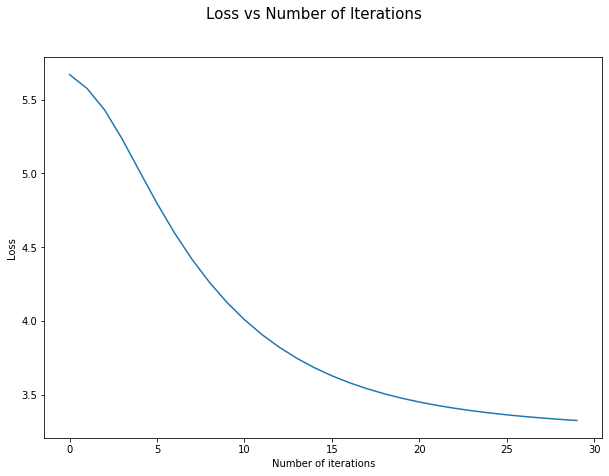

In [ ]:
plot(x_label="Number of iterations", y_label="Loss", title="Loss vs Number of Iterations", x=losses)

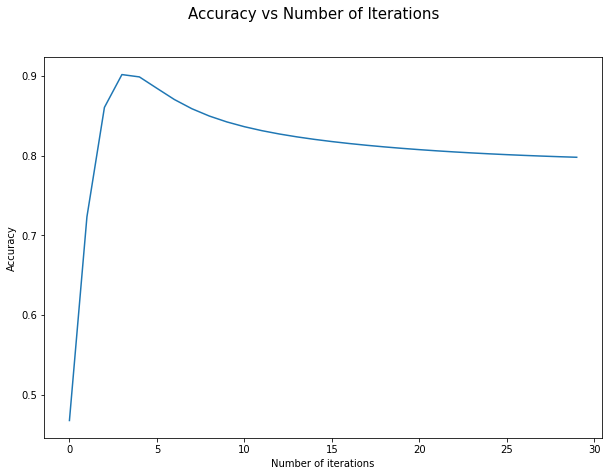

In [ ]:
plot(x_label="Number of iterations", y_label="Accuracy", title="Accuracy vs Number of Iterations", x=accuracies)

Question 2.5

---

The learning rate speeds up the time it takes for the training to converge. But if a very large learning rate is used, the model might keep bouncing around the global minima and never converge (or takes too much time to converge). And if is too small, it takes too much time to converge. In otherwords, its important to select a learning rate that would be just right for the training process.

In [ ]:
accuracies_list = []
for lr in range(1, 1000):
  lr = lr/1000
  model = NeuralNetwork(X_train, y_train, epoch=EPOCH, lr=lr)
  model.fit() 

  y_pred = model.predict(X_test)
  accuracy = r2_score(y_test, y_pred)
  accuracies_list.append(accuracy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


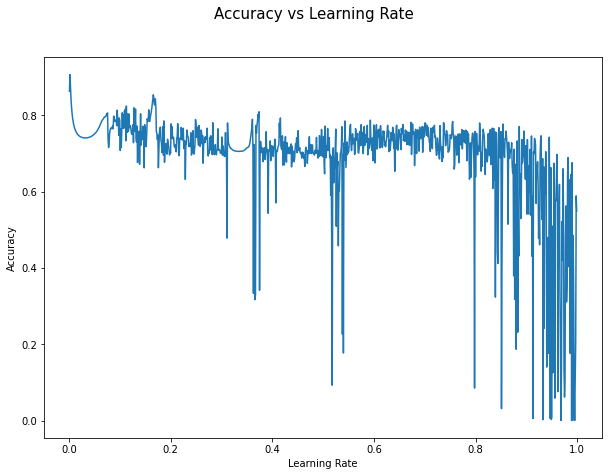

In [ ]:
plot(x_label="Learning Rate", y_label="Accuracy", title="Accuracy vs Learning Rate", x=[x/1000 for x in range(1, 1000)], y=accuracies_list)

As can be seen, the accuracy is best with a low learning rate, and then fluctuates until it starts dropping when it approaches 1. This is to say that the model started bouncing around the global minima and found it difficult to converge as a result of the large learning rate

---



Question 2.6

---

a. The update rule does not need to be recomputed since it does not take into account the number of neurons in each layer, just as it does not also take into account the number of inputs and outputs in the network. However, the dimensions need to be updated to ensure the matrix multiplications works.

In [ ]:
total_loss = []
total_accuracy = []
for h1 in range(1, 10):
  model = NeuralNetwork(X_train, y_train, h1=h1)
  model.fit()
  y_pred = model.predict(X_test)

  total_loss.append(mse_loss(y_test, y_pred))
  total_accuracy.append(r2_score(y_test, y_pred))

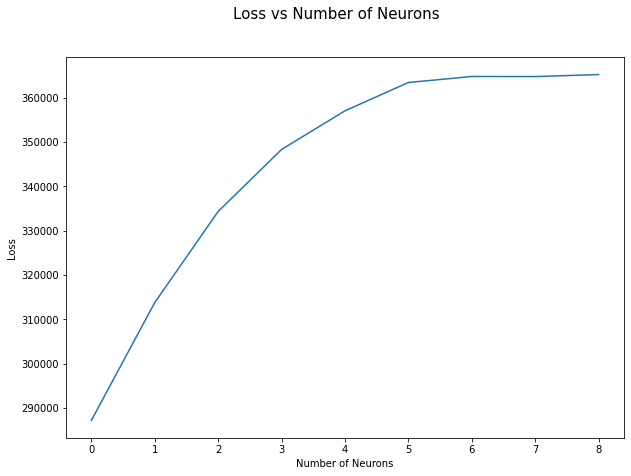

In [ ]:
plot(x_label="Number of Neurons", y_label="Loss", title="Loss vs Number of Neurons", x=total_loss)

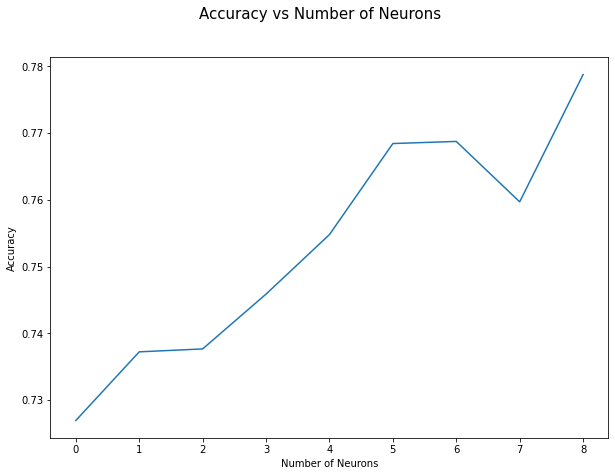

In [ ]:
plot(x_label="Number of Neurons", y_label="Accuracy", title="Accuracy vs Number of Neurons", x=total_accuracy)

b. The above plots show that increasing the number of neurons could improve the performance of the model as it would allow it capture more information in the data. However, it could start to overfit when it goes beyond a certain threshold, so care should be taken when selecting the number of neurons to be used in a neural network to avoid running into the risk of having an underfitting or overfitting. Also, as can be seen in the accuracy vs number of neurons plot, the model's peformance was almost constant when the number of neurons was between 5 and 6, then dropped between 6 and 7, before shouting up between 7 and 8.

---



Question 2.7

---

Activation function determines the neurons that would be activated and how the input is transformed into an output. Essentially, it can help introduce non-linearity to the network (when a linear or identity activation function is not used). 

---



a. Since the update rule is based on the value of g(Zi) and g'(Zi), a change in the value would require a change in the update rule as well when computing the gradients. However, mathematically, we don't need to alter our equations since g(Zi) and g'(Zi) signify an arbitrary activation function and its derivative.

b. For this experiment, I will be using the Tanh and the Linear activation functions, and their derivatives need to be computed and used in the backpropation algorithm instead of the derivative of the sigmoid function. These functions and their derivatives have been implemented at the top of the notebook.

In [ ]:
def train(act_fn):
  print("Training using the {} activation function\n".format(act_fn))
  model = NeuralNetwork(X_train, y_train, act_fn=act_fn)
  model.fit()

  train_losses = model.total_mse_loss
  train_accuracies = model.total_accuracy

  train_loss = model.average_mse_loss()
  print("Train Average MSE: ", round(train_loss, 2))

  train_accuracy = np.average(train_accuracies)
  print("Train Accuracy: ", train_accuracy)

  print()

  y_pred = model.predict(X_test)
  test_loss = mse_loss(y_test, y_pred)
  test_accuracy = r2_score(y_test, y_pred)

  print("Test Average MSE: ", round(test_loss, 2))
  print("Test Accuracy: ", test_accuracy)

  plot(x_label="Number of iterations", y_label="Loss", title="Loss vs Number of Iterations for " + act_fn, x=train_losses)
  print()
  plot(x_label="Number of iterations", y_label="Accuracy", title="Accuracy vs Number of Iterations for " + act_fn, x=train_accuracies)
  print()

Training using the SIGMOID activation function

Train Average MSE:  119.8
Train Accuracy:  0.8130272728349819

Test Average MSE:  348340.25
Test Accuracy:  0.745881531583004


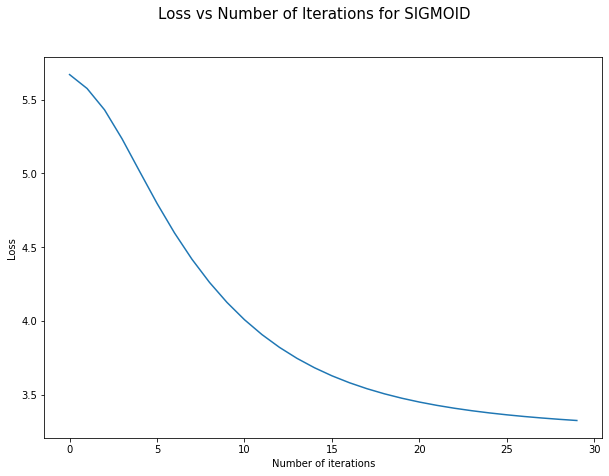

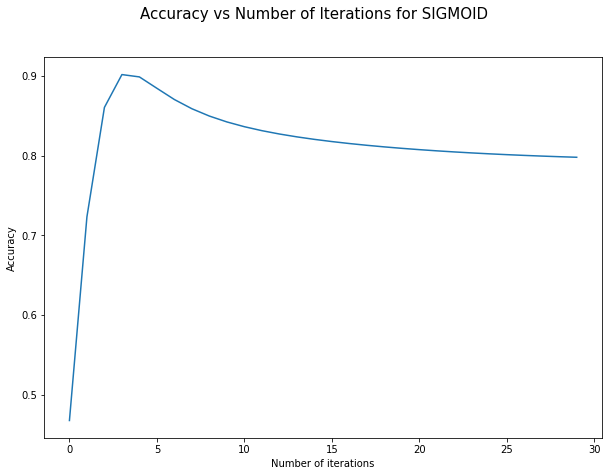


Training using the TANH activation function

Train Average MSE:  57.02
Train Accuracy:  0.7855613333877469

Test Average MSE:  450441.75
Test Accuracy:  0.7841685977522163


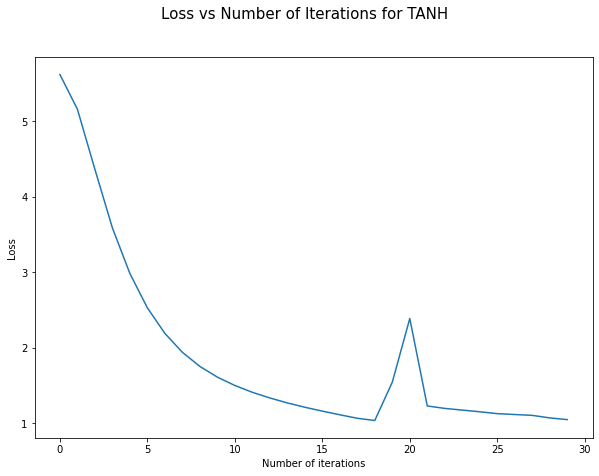

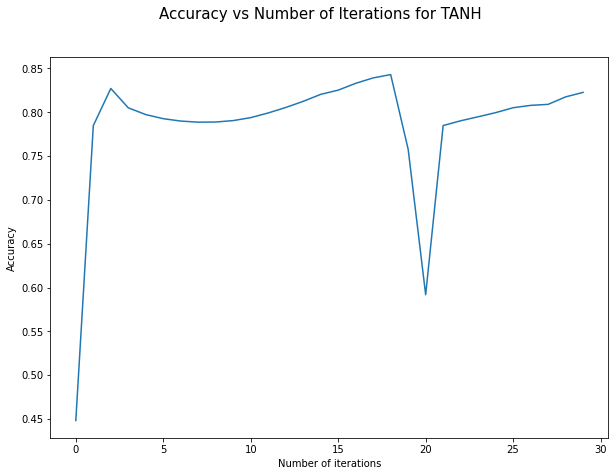


Training using the LINEAR activation function

Train Average MSE:  nan
Train Accuracy:  nan

Test Average MSE:  nan
Test Accuracy:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


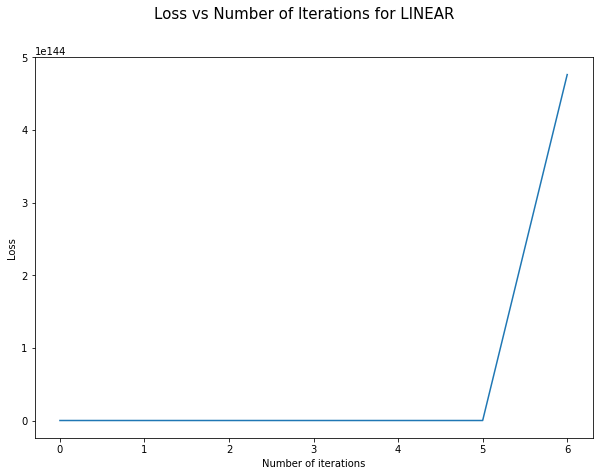

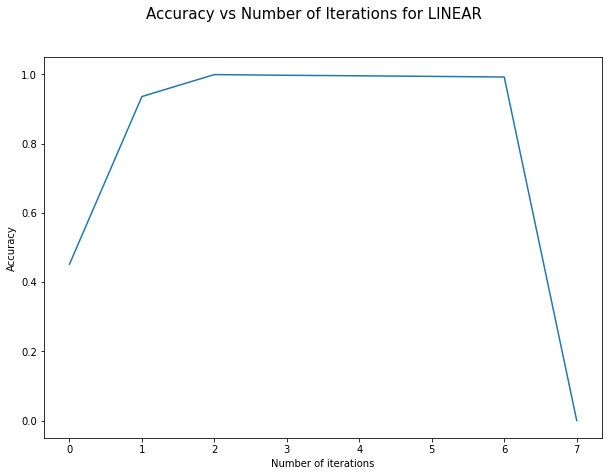

In [ ]:
act_fn_list = ["SIGMOID", "TANH", "LINEAR"]

for act_fn in act_fn_list:
  train(act_fn)

c. From the results above, we can see that there was a decrease in the train loss and train accuracy when the Tanh function was used as compared to the sigmoid function. However, the test loss and test accuracy increased for the Tanh function from the values for the sigmoid function.

In the case of linear activation function, we experienced an overflow due to its inability to capture the non-linearity in the network. 